<a href="https://colab.research.google.com/github/JSJeong-me/KOSA_Vision_Exercise/blob/main/yolo-cv-signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

In [1]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
img = 'traffic-signal-1.jpg'

# Inference
results = model(img)

#signals = results.pandas().xyxy[0]

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-10-23 torch 1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [2]:
signals = results.pandas().xyxy[0]

In [3]:
signals

,xmin,ymin,xmax,ymax,confidence,class,name
0,186.523438,331.281250,286.914062,560.187500,0.854980,9,traffic light
1,374.804688,262.140625,481.250000,502.374969,0.845215,9,traffic light


In [4]:
import cv2
from google.colab.patches import cv2_imshow

In [5]:
src = cv2.imread(img)

In [6]:
x1, y1, x2, y2 = int(signals.iloc[1,0]), int(signals.iloc[1,1]), int(signals.iloc[1,2]), int(signals.iloc[1,3])

In [18]:
#print(x1, y1)

186 331


In [19]:
#print(x2, y2)

286 560


In [7]:
signal1 = src[y1:y2, x1:x2]

In [ ]:
cv2_imshow(src)

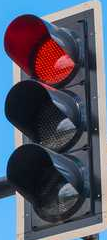

In [9]:
cv2_imshow(signal1)

In [10]:
#cv2.imwrite('./signal1.jpg', signal1)

True

In [11]:
import numpy as np

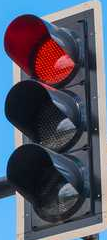

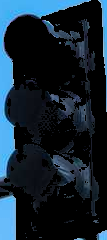

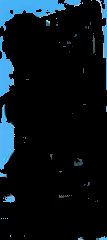

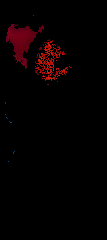

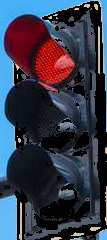

In [16]:
hsv_frame = cv2.cvtColor(signal1, cv2.COLOR_BGR2HSV)

# Red color
low_red = np.array([1, 220, 90]) # 161,155,84 
high_red = np.array([179, 255, 255])
red_mask = cv2.inRange(hsv_frame, low_red, high_red)
red = cv2.bitwise_and(signal1, signal1, mask=red_mask)

# Blue color
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])
blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
blue = cv2.bitwise_and(signal1, signal1, mask=blue_mask)

# Green color
low_green = np.array([25, 52, 72])
high_green = np.array([102, 255, 255])
green_mask = cv2.inRange(hsv_frame, low_green, high_green)
green = cv2.bitwise_and(signal1, signal1, mask=green_mask)

# Every color except white
low = np.array([0, 42, 0])
high = np.array([179, 255, 255])
mask = cv2.inRange(hsv_frame, low, high)
result = cv2.bitwise_and(signal1, signal1, mask=mask)

#cv2_imshow(signal1)
cv2_imshow(blue)
cv2_imshow(green)
cv2_imshow(red)
#cv2_imshow(result)